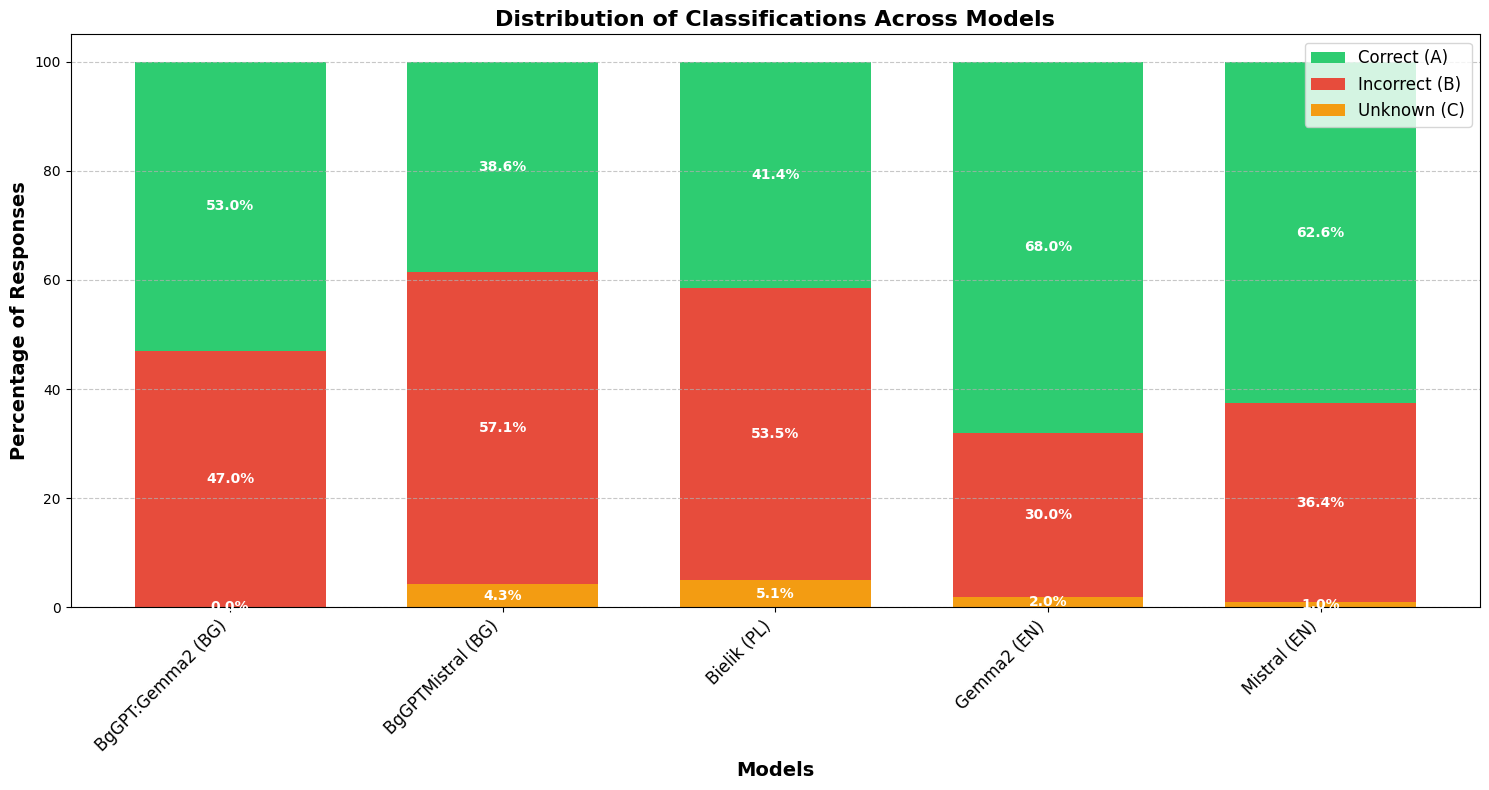

Model Classification Percentages:
BgGPT:Gemma2 (BG): Correct (A)=53.0%, Incorrect (B)=47.0%, Unknown (C)=0.0%
BgGPTMistral (BG): Correct (A)=38.6%, Incorrect (B)=57.1%, Unknown (C)=4.3%
Bielik (PL): Correct (A)=41.4%, Incorrect (B)=53.5%, Unknown (C)=5.1%
Gemma2 (EN): Correct (A)=68.0%, Incorrect (B)=30.0%, Unknown (C)=2.0%
Mistral (EN): Correct (A)=62.6%, Incorrect (B)=36.4%, Unknown (C)=1.0%


In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

models = {
    'BgGPT:Gemma2 (BG)': "../data/output_evaluation/bg/triviaqaSimpleQA-BGGEMMA2-llm.csv",
    'BgGPTMistral (BG)': "../data/output_evaluation/bg/triviaqaSimpleQA-Mistral.csv",
    'Bielik (PL)': "../data/output_evaluation/pl/trivia_answers_polish_bielik_cleaned_NEW.csv",
    'Gemma2 (EN)': "../data/output_evaluation/en/trivia_answers_english_gemma_NEW.csv",
    'Mistral (EN)': "../data/output_evaluation/en/trivia_answers_english_mistral_cleaned_NEW.csv",
}

plt.figure(figsize=(15, 8))

classification_data = {'A': [], 'B': [], 'C': []}

for model_name, file_path in models.items():
    df = pd.read_csv(file_path)
    mapped_counts = df['Classification'].value_counts(normalize=True) * 100
    
    classifications = ['A', 'B', 'C']
    for classification in classifications:
        classification_data[classification].append(mapped_counts.get(classification, 0))

a_percentages = np.array(classification_data['A'])
b_percentages = np.array(classification_data['B'])
c_percentages = np.array(classification_data['C'])

x = np.arange(len(models))
width = 0.7

plt.bar(x, a_percentages, width, label='Correct (A)', color='#2ecc71', bottom=b_percentages+c_percentages)
plt.bar(x, b_percentages, width, label='Incorrect (B)', color='#e74c3c', bottom=c_percentages)
plt.bar(x, c_percentages, width, label='Unknown (C)', color='#f39c12')

plt.xlabel('Models', fontsize=14, fontweight='bold')
plt.ylabel('Percentage of Responses', fontsize=14, fontweight='bold')
plt.title('Distribution of Classifications Across Models', fontsize=16, fontweight='bold')
plt.xticks(x, models.keys(), rotation=45, ha='right', fontsize=12)
plt.legend(fontsize=12, loc='upper right', bbox_to_anchor=(1, 1))

for i in range(len(models)):
    total_height = a_percentages[i] + b_percentages[i] + c_percentages[i]
    
    plt.text(i, c_percentages[i]/2, f'{c_percentages[i]:.1f}%', 
             ha='center', va='center', fontsize=10, color='white', fontweight='bold')
    plt.text(i, c_percentages[i] + b_percentages[i]/2, f'{b_percentages[i]:.1f}%', 
             ha='center', va='center', fontsize=10, color='white', fontweight='bold')
    plt.text(i, c_percentages[i] + b_percentages[i] + a_percentages[i]/2, f'{a_percentages[i]:.1f}%', 
             ha='center', va='center', fontsize=10, color='white', fontweight='bold')

plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

print("Model Classification Percentages:")
for model_name, classifications in zip(models.keys(), zip(
    classification_data['A'],
    classification_data['B'],
    classification_data['C'])):
    print(f"{model_name}: Correct (A)={classifications[0]:.1f}%, Incorrect (B)={classifications[1]:.1f}%, Unknown (C)={classifications[2]:.1f}%")



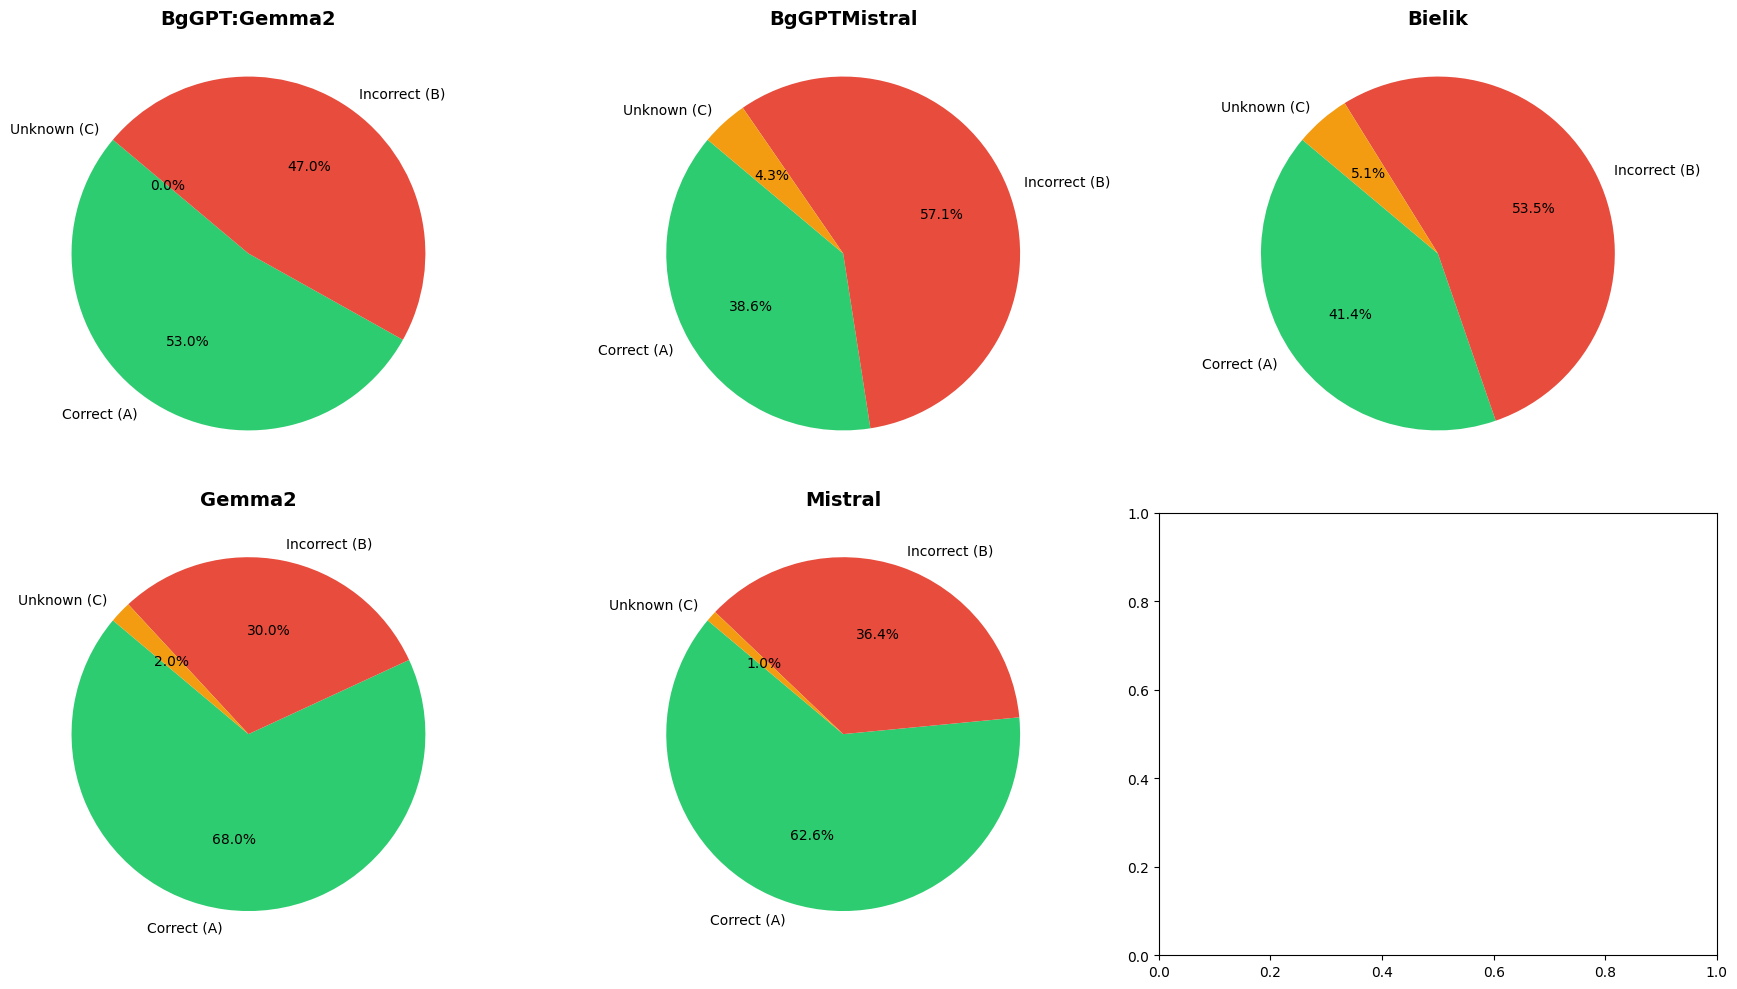

Model Classification Percentages:
BgGPT:Gemma2: Correct (A)=53.0%, Incorrect (B)=47.0%, Unknown (C)=0.0%
BgGPTMistral: Correct (A)=38.6%, Incorrect (B)=57.1%, Unknown (C)=4.3%
Bielik: Correct (A)=41.4%, Incorrect (B)=53.5%, Unknown (C)=5.1%
Gemma2: Correct (A)=68.0%, Incorrect (B)=30.0%, Unknown (C)=2.0%
Mistral: Correct (A)=62.6%, Incorrect (B)=36.4%, Unknown (C)=1.0%


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

models = {
    'BgGPT:Gemma2': "../data/output_evaluation/bg/triviaqaSimpleQA-BGGEMMA2-llm.csv",
    'BgGPTMistral': "../data/output_evaluation/bg/triviaqaSimpleQA-Mistral.csv",
    'Bielik': "../data/output_evaluation/pl/trivia_answers_polish_bielik_cleaned_NEW.csv",
    'Gemma2': "../data/output_evaluation/en/trivia_answers_english_gemma_NEW.csv",
    'Mistral': "../data/output_evaluation/en/trivia_answers_english_mistral_cleaned_NEW.csv",
}


classification_data = {'A': [], 'B': [], 'C': []}

for model_name, file_path in models.items():
    df = pd.read_csv(file_path)
    mapped_counts = df['Classification'].value_counts(normalize=True) * 100
    
    classifications = ['A', 'B', 'C']
    for classification in classifications:
        classification_data[classification].append(mapped_counts.get(classification, 0))

fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

colors = ['#2ecc71', '#e74c3c', '#f39c12']
labels = ['Correct (A)', 'Incorrect (B)', 'Unknown (C)']

for ax, model_name in zip(axes, models.keys()):
    sizes = [classification_data['A'][list(models.keys()).index(model_name)],
             classification_data['B'][list(models.keys()).index(model_name)],
             classification_data['C'][list(models.keys()).index(model_name)]]
    
    ax.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
    ax.set_title(model_name, fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

print("Model Classification Percentages:")
for model_name, classifications in zip(models.keys(), zip(
    classification_data['A'],
    classification_data['B'],
    classification_data['C'])):
    print(f"{model_name}: Correct (A)={classifications[0]:.1f}%, Incorrect (B)={classifications[1]:.1f}%, Unknown (C)={classifications[2]:.1f}%")
